# Function as unit of work

__________________________
- are groups of code that have a name
- can be called using parentheses

For example, ``print()``

## 1.Function definitions
________________

-  **``def`` statement:**
------------------------
```
def function_name(parameter_list):
    statements
```

In [ ]:
def add(x, y): 
    """Return x plus y"""
    return x + y

In [ ]:
add(1, 2)

In [ ]:
def fibonacci(n):
    """Return a list containing the Fibonacci series up to n"""
    fl = []
    a, b = 0, 1
    while len(fl) < n:
        a, b = b, a + b
        fl.append(a)
    return fl

In [ ]:
fibonacci(15)

- **`` lambda`` statement:**
---------------------

``lambda parameter_list: expression ``

In [ ]:
mult = lambda x, y: x * y
mult(5, 2)

#### Function definition schema
- ```def``` must be followed by the function name and the parenthesized list of (formal) parameters
- statements (the **body** of the function) start at the next line, and must be indented
- the first statement of the function body can optionally be a function’s documentation string, or **docstring** (string literal)
- nested function definitions may be contained in the function body 
- function definition introduces the function name in the current **symbol table**
- value of the function name has a type of a user-defined function

#### Function as the first-class object
A “first-class object” is a program **entity** that can be:
- created at **runtime**
- **assigned** to a variable or element in a data structure
- **passed** as an argument to a function
- **returned** as the result of a function

In [ ]:
print(type(add))

In [ ]:
print(add.__doc__)

In [ ]:
print(type(mult))

In [ ]:
print(mult.__doc__)

In [ ]:
def h(x, y, f): 
    return x + y+f(x,y)

In [ ]:
h(1,2,mult)

In [ ]:
h(1,2,lambda x, y: x * y)

## 2. Function call: execution 
__________________________________
### Symbol table
- a new **symbol table** is introduced for the **local variables** of the function
- **arguments** (actual parameters) to a function call are introduced in the local symbol table of the called function 
- arguments are passed using **call by value** (where the value is always an object **reference**, not the value of the object)
- all **variable assignments** in a function store the value in the local symbol table
- when a function calls **another function**, a new local symbol table is created for that call

### Name resolution 
- variable references first look in the **local** symbol table 
- then in the local symbol tables of **enclosing** functions 
- then in the **global** symbol table
- finally in the table of **built-in** names

Global variables cannot be directly assigned a value within a function (unless named in a global statement), although they may be referenced

In [ ]:
def fibonacci(n):
    """Return a list containing the Fibonacci series up to n"""
    f = []
    #f.append(str(type(n)))
    #f.append(type(n))
    a, b = 0, 1
    while len(f) < n:
        a, b = b, a + b
        f.append(a)
    return f

In [ ]:
fibonacci(5)

## 3. Parameters & Arguments

___________________________________
- positional args (non-keyword)
- keyword args -- are specified by name


When non-keyword arguments are used together with keyword arguments, the keyword arguments must come **at the end**.

### Checking args type at runtime: deduction

In [ ]:
add(1,2)

In [ ]:
add("one","two")

In [ ]:
mult("one","two")

In [ ]:
mult("one",20)

In [ ]:
mult(2,"one")

- [``type()``](https://docs.python.org/3/library/functions.html#type) : explicit way getting the object type

In [ ]:
pairs = [(5, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
print (type (pairs))
print (type ((1, 'one')))

### Keyword args

In [ ]:
pairs.sort(key=lambda pair: pair[0])
pairs

- keyword arg ``sep`` for [``print()``](https://docs.python.org/3/library/functions.html#print) -- what character or characters should be used to separate multiple items

In [ ]:
print(1, 2, 3)

In [ ]:
print(1, 2, 3, sep='--')

A function ``fibonacci``, which takes a single argument ``n``, does something with this argument, and ``return``s a value; in this case, a list of the first ``n`` Fibonacci numbers:

In [ ]:
fibonacci(10)

There is no type information associated with the function inputs or outputs.
Python functions can return any Python object, simple or compound.

For example, **multiple return values** are simply put in a tuple, which is indicated by commas:

In [ ]:
def real_imag_conj(val):
    return val.real, val.imag, val.conjugate()

r, i, c = real_imag_conj(3 - 4j)
print(r, i, c)

### Default Argument Values

- **default values** for arguments -- certain values that we want the function to use *most* of the time

Updated  ``fibonacci`` -- continuing the Fibonacci series

In [ ]:
def fibonacci(n, a=0, b=1):
    # 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610
    f = []
    while len(f) < n:
        a, b = b, a + b
        f.append(a)
    return f

With a single argument, the result of the function call is identical to before:

In [ ]:
fibonacci(10)

The effect of new starting values:

In [ ]:
fibonacci(10, 8, 13)

The **order** of the named values does not matter:

In [ ]:
fibonacci(10, b=13, a=8)

- Mutable data types such as lists, sets, and dictionaries should never be used as default values 

(this is because the default value is evaluated **only once** at the point of function definition and **retains state** from one call to the next)

In [ ]:
# Do not do this!
def myappend(x, lst=[]):
    lst.append(x)
    print(lst)
    return lst

In [ ]:
myappend(6)
myappend(42)
myappend(12, [1, 16])
myappend(65)

Updated version:

In [ ]:
def myappend(x, lst=None):
    if lst is None:
        lst = []
    lst.append(x)
    print(lst)
    return lst

In [ ]:
myappend(6)
myappend(42)
myappend(12, [1, 16])
myappend(65)

### Mutable and immutable args
* Changes to **string, number, tuple and ``None``** arguments of a function within the function **do not affect** their values in the calling program.
* Changes to values of elements in **list, dictionary and array** arguments of a function within the function **are reflected** in the values of the same elements in the calling function.

- Because immutable objects can’t be changed, changing them within a function **creates new objects** with the same name inside of the function, but the old immutable objects that were used as arguments in the function call remain unchanged in the calling program. 

- If elements of mutable objects are changed, then those elements that are changed inside the function **are also changed** in the calling program.

In [ ]:
def testArgsP(s):
    print(id(s))
    print(s)
    print(id(s))
    return s

In [ ]:
x='a'
print(id(x))
testArgsP(x)

In [ ]:
x=100
print(id(x))
testArgsP(x)

In [ ]:
def testArgsV(s):
    print(id(s))
    s+=10
    print(id(s))
    return s

In [ ]:
v=1
print(id(v))

In [ ]:
testArgsV(v)

In [ ]:
print(v) 

In [ ]:
print(id(v))

In [ ]:
def testArgsVW(s,p):
    print(id(s))
    s+=p
    print(id(s))
    return s

In [ ]:
v=1
w=10
print(id(v),id(w))
testArgsVW(v,w)

In [ ]:
print(v,w)

In [ ]:
print(id(v))

In [ ]:
v='a'
w='b'
print(id(v),id(w))
testArgsVW(v,w)

In [ ]:
print(v,w)

In [ ]:
print(id(v),id(w))

In [ ]:
v+=w

In [ ]:
print(v,w)

In [ ]:
id(v)

In [ ]:
def testArgs(s):
    print(id(s))
    i=0
    for ch in s:
        if ch=='a':
            s[i]='A'
        i+=1
    print(id(s))
    return s

In [ ]:
l=['a','b','c']
print(id(l))
testArgs(l)

In [ ]:
print(l)

In [ ]:
st='abc'
testArgs(st)

In [ ]:
tp=('a','b','c')
testArgs(tp)

In [ ]:
def testArgsSeq(s):
    print(id(s))   
    for i in s:
        print(i)
    print(id(s))
    return s

In [ ]:
testArgsSeq(tp)

In [ ]:
testArgsSeq(l)

In [ ]:
def testArgsDic(s):
    print(id(s))
    k=s.keys()
    for i in k:
        if s[i]==2:
            s[i]=100
    print(id(s))
    return s

In [ ]:
numbers = {'one':1, 'two':2, 'three':3}

In [ ]:
testArgsDic(numbers)

In [ ]:
numbers

In [ ]:
def testArgsDic1(s):
    print(id(s))
    k=s.keys()
    for i in k:
        if i[0]=='t':
            s[i]=100
    print(id(s))
    return s

In [ ]:
numbers = {'one':1, 'two':2, 'three':3}
testArgsDic1(numbers)

In [ ]:
n={1,2,3}

In [ ]:
testArgsDic(n)

In [ ]:
testArgsSeq(n)

### Flexible Arguments : ``*args`` and ``**kwargs`` 
------------------
- If function can be called with an **arbitrary number** of arguments these arguments will be wrapped up in a tuple or dictionary. 

In this case the special form ``*args`` and ``**kwargs`` can used to catch all arguments that are passed.

- Before the variable number of arguments, zero or more normal arguments may occur.

- ``args`` and ``kwargs`` are just the variable names used **by convention**, short for "arguments" and "keyword arguments"

- character ``*``  is important 

In [1]:
def catch_all(*args, **kwargs):
    print("args =", args)
    print("kwargs = ", kwargs)

In [2]:
catch_all(1, 2, 3, a=4, b=5)

args = (1, 2, 3)
kwargs =  {'a': 4, 'b': 5}


In [ ]:
catch_all(1, 2, 3, a=4, b=5, c=6)

In [ ]:
catch_all('a', keyword=2)

The asterisk characters define an operative difference : 
- a single ``*`` before a variable means "expand this as a sequence"
- a double ``**`` before a variable means "expand this as a dictionary".

The same syntax with asterisk can be used with the function call for unpacking argument lists:

In [4]:
inputs = (1, 2, 3)
keywords = {'pi': 3.14}

catch_all(*inputs, **keywords)

args = (1, 2, 3)
kwargs =  {'pi': 3.14}


In [5]:
catch_all(inputs, keywords) # !!!

args = ((1, 2, 3), {'pi': 3.14})
kwargs =  {}


###  ``sorted`` function to sort data

In [ ]:
sorted([2,4,3,5,1,6])

In [ ]:
data = [{'first':'Guido', 'last':'Van Rossum', 'YOB':1956},
        {'first':'Grace', 'last':'Hopper',     'YOB':1906},
        {'first':'Alan',  'last':'Turing',     'YOB':1912}]

Dictionaries are not orderable so a way to tell the function *how* to sort data is to specify the ``key`` function which given an item returns the sorting key for that item:

In [ ]:
# sort alphabetically by first name
sorted(data, key=lambda item: item['first'])

In [ ]:
# sort by year of birth
sorted(data, key=lambda item: item['YOB'])


While these key functions could certainly be created by the ``def`` syntax, the ``lambda`` syntax is convenient for such short functions.

### Variable-length sequaces of parameters
* ``*args`` -- means a series of individual **positional** parameters which are elements of the variable-length tuple 
* ``**kwargs`` -- means a series of individual **keyword** parameters which are elements of the variable-length dictionary
* ``args`` and ``kwargs`` -- short for "arguments" and "keyword arguments", are just the variable names (by convention), which can be used as single parameters (tuple or/and dictionary) inside the function 
* if a function takes only ``*args`` and ``**kwargs`` as its parameters, it can be called with any set of parameters: one or both of ``args`` and ``kwargs`` can be empty, so the function will accept any combination of positional and keyword parameters, including no parameters at all
* ``**kwargs`` and other keyword arguments must come after all positional arguments

In [ ]:
def catch_all(*args, **kwargs):
    if not len(args) and not len(kwargs):
        print("both of args and kwargs are empty")
        return
    print(f"type of args ={type(args)}, args ={args}")
    print(f"type of kwargs ={type(kwargs)}, kwargs ={kwargs}" )
    print("*args =", *args)
    print("*kwargs = ", *kwargs)

In [ ]:
catch_all(1, 2, 3, a=4, b=5)

In [ ]:
catch_all('a', keyword=2)

In [ ]:
catch_all()

In [ ]:
catch_all(1, 2, 3, a=4, b=5, a=6)

In [ ]:
inputs = (1, 2, 3)
keywords = {'pi': 3.14}
catch_all(*inputs, **keywords)

In [ ]:
catch_all(inputs, keywords) 

In [ ]:
keywords1 = {'pi1': 3.14}
catch_all(10,*inputs,*inputs,20, thirty=30, **keywords, **keywords1,  forty=40)

## 4. [Python Standard Library(overview)](https://docs.python.org/3/library/)
- built-in modules (written in C) that provide access to system functionality such as file I/O
- modules written in Python that provide **standardized** solutions for many problems that occur in everyday programming

## 5. [Built-in Functions](https://docs.python.org/3/library/functions.html)

Python interpreter has a number of functions and types built into it that are always available. 

## [``help()``](https://docs.python.org/3/library/functions.html#help)
``help([object])``

In [ ]:
help()

## [``print()``](https://docs.python.org/3/library/functions.html#print)

``print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)``

In [ ]:
print(type(print))

In [ ]:
print(print.__doc__)

## [``input()``](https://docs.python.org/3/library/functions.html#input)

``input([prompt])``
- If the prompt argument is present, it is written to standard output without a trailing newline
- The function then reads a line from input, converts it to a string (stripping a trailing newline), and returns that 
- When EOF is read, EOFError is raised.

In [ ]:
name=input('Enter your name: ')
print(name)

In [ ]:
print(type(input))

In [ ]:
print(input.__doc__)

## [File IO for string](https://docs.python.org/3/library/io.html)

The ``io`` module provides main facilities for dealing with various types of I/O. There are three main types of I/O: text I/O, binary I/O and raw I/O.

Text I/O expects and produces ``str`` objects. This means that whenever the backing store is natively made of bytes (such as in the case of a file), encoding and decoding of data is made transparently as well as optional translation of platform-specific newline characters.

---------------------------

The easiest way to create a text stream is with ``open()``, optionally specifying an encoding:

```f = open("file.txt", "r", encoding="utf-8")```

---------------------------

``read(size=-1)``

Read and return at most``size`` characters from the stream as a single ``str``. If ``size`` is negative or ``None``, reads until EOF.

--------------------------------

``write(s)``

Write the string ``s`` to the stream and return the number of characters written.

-------------------------------------

``readline(size=-1)``

Read until newline or EOF and return a single ``str``. If the stream is already at EOF, an empty string is returned.


In [ ]:
with open('greeting.txt', 'w') as gf:
    gf.write("Hello!")

In [ ]:
with open('greeting.txt', 'r') as gf:
    data = gf.read()
print(data)

In [ ]:
print(type(data))

In [ ]:
a = 1.0
print(type(a))
with open('abc.txt', 'w') as abcText:
    abcText.write(str(a))

In [ ]:
a=2
print(type(a))
with open('abc.txt', 'r') as abcText:
    a =float( abcText.read())

print(type(a))
a+=3
print(a)
print(type(a))

In [ ]:
abc =str((1.0,2.0,3.0))
#abc =str(1.0,2.0,3.0)
with open('abc.txt', 'w') as abcText:
    abcText.write(abc)

In [ ]:
with open('abc.txt', 'r') as abcText:
    data = abcText.read()
print(type(data),data)

In [ ]:
abc =[1.0,2.0,3.0]
with open('abc.txt', 'w') as abcText:
    abcText.write(abc)

In [ ]:
print(data[2])

In [ ]:
a,b,c = data.split()
print(type(b))
print(a,b,c) 

## [``range()``](https://docs.python.org/3.7/library/functions.html#func-range)
```
class range(stop)
class range(start, stop[, step])
```
Rather than being a function, range is actually an immutable sequence type

In [16]:
print(type(range(3)))

<class 'range'>


In [17]:
for i in range(5,10,2):
    print(i, end=' ')

5 7 9 

In [18]:
list(range(5, 10, 2))

[5, 7, 9]

## [``chr()``](https://docs.python.org/3.7/library/functions.html#chr)

``chr(i)``   

Return the string representing a character whose Unicode code point is the integer i. For example, chr(97) returns the string 'a', while chr(8364) returns the string '€'. This is the inverse of ord().

The valid range for the argument is from 0 through 1,114,111 (0x10FFFF in base 16). ValueError will be raised if i is outside that range.

In [ ]:
chr(97)

In [ ]:
chr(8364)

## [``ord()``](https://docs.python.org/3.7/library/functions.html#ord)

``ord(c)``   

Given a string representing one Unicode character, return an integer representing the Unicode code point of that character.

This is the inverse of chr().

In [ ]:
ord('a')

In [ ]:
ord('€')

## ``random`` module

In [5]:
import random as rnd

In [ ]:
help(rnd)

In [8]:
help(rnd.random)

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).



In [9]:
help(rnd.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [10]:
help(rnd.randrange)

Help on method randrange in module random:

randrange(start, stop=None, step=1) method of random.Random instance
    Choose a random item from range(start, stop[, step]).
    
    This fixes the problem with randint() which includes the
    endpoint; in Python this is usually not what you want.



In [7]:
def walkout(steps):
    position = 0
    walk = [position]
    for i in range(steps):
        step = rnd.randint(-1, 1)
        position += step
        walk.append(position)
    return walk

## [NumPy](https://numpy.org/)

- NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. 
- NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
- The core of NumPy is well-optimized C code.


[Array creation](https://numpy.org/doc/stable/user/basics.creation.html) 

In [7]:
import numpy as np

### ``array()`` 
convertation of numerical data arranged in an array-like structure (lists and tuples)  to arrays 

In [ ]:
x = np.array([[2, 3, 1, 0],(4, 5, 6, 7)])
x

In [ ]:
print(x)

In [ ]:
y = np.arange(2, 6, 0.5, dtype=float)
y

### ``linspace()``
creating arrays with a specified number of elements, and spaced equally between the specified beginning and end values.

In [8]:
z = np.linspace(2, 6, 9)
z

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ])

### ``randint()``

In [ ]:
from numpy import random

In [ ]:
random.randint(1, 5+1, size=(2, 4))

In [ ]:
random.randint(1, 5+1, size=(2, 4))

In [ ]:
vals = random.randint(1, 5+1, 10)
vals

### ``random_sample(), random()``
Return random floats in the half-open interval [0.0, 1.0)

In [ ]:
random.random_sample()

In [ ]:
random.random_sample(4)

In [ ]:
random.random_sample(size=(2, 4))

In [ ]:
10*random.random_sample(4)-5

In [ ]:
print(help(random.random_sample))

In [ ]:
random.random(size=(2, 4))

In [ ]:
print(help(random.random))

## [matplotlib](https://matplotlib.org/)

A comprehensive library for creating static, animated, and interactive visualizations.

[Gallery](https://matplotlib.org/gallery/index.html) contains examples of the Matplotlib usings

[Simple Plot](https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
type(plt.plot)

function

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


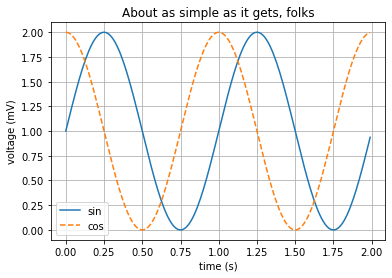

In [4]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
c = 1 + np.cos(2 * np.pi * t)

fig, ax = plt.subplots()
print(type(fig), type(ax))

ax.plot(t, s, label='sin')
ax.plot(t, c, '--', label='cos')
ax.legend();
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

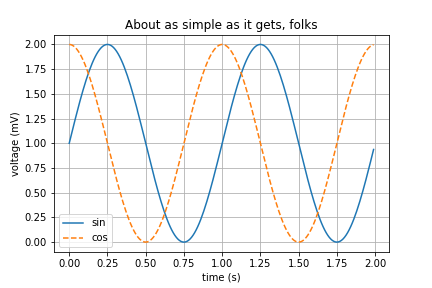

In [5]:
from IPython.display import Image
Image("test.png")

## [OpenCV](https://docs.opencv.org/master/d9/df8/tutorial_root.html)

OpenCV (Open Source Computer Vision Library: http://opencv.org) is an open-source library that includes several hundreds of computer vision algorithms.

[Installation OpenCV](https://www.youtube.com/watch?v=d3AT9EGp4iw&ab_channel=ProgrammingKnowledge)

In [6]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [7]:
cv2.__version__

NameError: name 'cv2' is not defined

In [8]:
img = cv2.imread('Guido_portrait.jpg',1)

NameError: name 'cv2' is not defined

In [ ]:
print(img)

In [ ]:
cv2.imshow('Guido', img)
cv2.waitKey(5000)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('Guido_portrait_1.jpg', img)

In [ ]:
cap= cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    cv2.imshow("frame",frame)
    if cv2.waitKey(1)&0xFF == ord('q'):
        break

caqp.release()

cv2.destroyAllWindows()